In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import xgboost as xgb
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# # importing required libraries
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score

In [3]:
# importing or loading the dataset
df = pd.read_excel('experiment.xlsx')

# distributing the dataset into two components X and Y
#X = dataset.iloc[:, 0:13].values
#y = dataset.iloc[:, 13].values


In [4]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 1584,Unnamed: 1585,Unnamed: 1586,Unnamed: 1587,Unnamed: 1588,Unnamed: 1589,Unnamed: 1590,Unnamed: 1591,Unnamed: 1592,Unnamed: 1593
0,A,1.855221,4.800578,7.744859,10.688064,13.630195,16.571252,19.511237,22.450150,25.387993,...,3679.874201,3681.719731,3683.564790,3685.409377,3687.253493,3689.097139,3690.940313,3692.783018,3694.625252,3696.467015
1,A,595.200012,535.900024,508.500000,502.500000,501.399994,500.100006,502.500000,501.600006,501.600006,...,503.299988,505.399994,506.100006,504.600006,504.200012,504.500000,503.899994,503.399994,503.799988,504.100006
2,A,605.299988,539.400024,509.399994,503.000000,501.299988,502.100006,501.700012,501.799988,501.899994,...,516.900024,514.700012,514.400024,514.500000,515.500000,516.500000,515.500000,513.500000,514.400024,512.500000
3,A,626.900024,545.099976,510.500000,503.100006,503.700012,501.899994,503.299988,501.600006,502.399994,...,508.399994,506.299988,506.799988,508.299988,505.299988,505.799988,506.200012,506.700012,505.799988,505.299988
4,A,628.400024,547.000000,511.399994,503.500000,501.200012,501.500000,501.299988,501.799988,501.600006,...,514.599976,513.000000,514.400024,514.799988,511.299988,512.500000,513.599976,513.000000,511.100006,513.000000


In [5]:
df.rename(columns = {'Unnamed: 0':'Wavenumber'}, inplace = True)
  

In [6]:
df.head()

,Wavenumber,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 1584,Unnamed: 1585,Unnamed: 1586,Unnamed: 1587,Unnamed: 1588,Unnamed: 1589,Unnamed: 1590,Unnamed: 1591,Unnamed: 1592,Unnamed: 1593
0,A,1.855221,4.800578,7.744859,10.688064,13.630195,16.571252,19.511237,22.450150,25.387993,...,3679.874201,3681.719731,3683.564790,3685.409377,3687.253493,3689.097139,3690.940313,3692.783018,3694.625252,3696.467015
1,A,595.200012,535.900024,508.500000,502.500000,501.399994,500.100006,502.500000,501.600006,501.600006,...,503.299988,505.399994,506.100006,504.600006,504.200012,504.500000,503.899994,503.399994,503.799988,504.100006
2,A,605.299988,539.400024,509.399994,503.000000,501.299988,502.100006,501.700012,501.799988,501.899994,...,516.900024,514.700012,514.400024,514.500000,515.500000,516.500000,515.500000,513.500000,514.400024,512.500000
3,A,626.900024,545.099976,510.500000,503.100006,503.700012,501.899994,503.299988,501.600006,502.399994,...,508.399994,506.299988,506.799988,508.299988,505.299988,505.799988,506.200012,506.700012,505.799988,505.299988
4,A,628.400024,547.000000,511.399994,503.500000,501.200012,501.500000,501.299988,501.799988,501.600006,...,514.599976,513.000000,514.400024,514.799988,511.299988,512.500000,513.599976,513.000000,511.100006,513.000000


In [7]:
# importing or loading the dataset
#dataset = pd.read_csv('/content/drive/MyDrive/Wine.csv')

# distributing the dataset into two components X and Y
#X = dataset.iloc[:, 0:13].values
#y = dataset.iloc[:, 13].values



In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Columns: 1594 entries, Wavenumber to Unnamed: 1593
dtypes: float64(1593), object(1)
memory usage: 2.6+ MB


In [9]:
len(df)

213

In [10]:
df.keys()

Index(['Wavenumber', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       ...
       'Unnamed: 1584', 'Unnamed: 1585', 'Unnamed: 1586', 'Unnamed: 1587',
       'Unnamed: 1588', 'Unnamed: 1589', 'Unnamed: 1590', 'Unnamed: 1591',
       'Unnamed: 1592', 'Unnamed: 1593'],
      dtype='object', length=1594)

In [11]:
df.describe()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 1584,Unnamed: 1585,Unnamed: 1586,Unnamed: 1587,Unnamed: 1588,Unnamed: 1589,Unnamed: 1590,Unnamed: 1591,Unnamed: 1592,Unnamed: 1593
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,...,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1063.939741,738.391554,559.429083,509.765202,502.315869,500.729678,500.448175,500.423005,499.985859,500.022417,...,553.747885,553.642971,553.594867,553.446994,553.282881,553.046467,553.264510,553.012362,552.785800,553.129892
std,925.259145,454.300775,134.437424,40.980463,34.036914,33.423573,33.145439,32.932810,32.691833,32.493858,...,218.793103,218.925986,219.014944,219.176768,219.300805,219.364728,219.584833,219.659153,219.803634,219.935468
min,1.855221,4.800578,7.744859,10.688064,13.630195,16.571252,19.511237,22.450150,25.387993,28.324766,...,503.299988,503.500000,504.600006,503.500000,503.200012,503.399994,502.600006,503.200012,503.799988,503.899994
25%,644.799988,547.000000,510.000000,503.799988,502.600006,501.899994,501.799988,501.700012,501.500000,501.500000,...,515.000000,514.900024,514.700012,514.799988,514.200012,514.299988,513.799988,514.099976,514.000000,514.299988
50%,812.500000,615.599976,524.700012,505.500000,503.299988,502.600006,502.600006,502.600006,502.200012,502.299988,...,522.500000,522.099976,523.099976,522.400024,522.599976,522.299988,522.299988,523.099976,522.200012,522.000000
75%,1050.900024,714.299988,546.099976,508.899994,504.500000,503.299988,503.299988,503.500000,503.000000,503.000000,...,543.500000,545.099976,544.400024,544.599976,545.299988,544.000000,545.799988,544.200012,543.799988,545.000000
max,6713.100098,3372.000000,1313.699951,638.900024,533.200012,515.400024,509.500000,506.899994,505.100006,505.399994,...,3679.874201,3681.719731,3683.564790,3685.409377,3687.253493,3689.097139,3690.940313,3692.783018,3694.625252,3696.467015


In [12]:
from sklearn.preprocessing import LabelEncoder 

In [13]:
le=LabelEncoder()

In [14]:
x=df.drop("Wavenumber",axis=1)
y=df["Wavenumber"]

In [15]:
len(x)

213

In [16]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(sampling_strategy='auto')
X,y=sm.fit_resample(x,y)

In [17]:
len(X)

260

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Columns: 1594 entries, Wavenumber to Unnamed: 1593
dtypes: float64(1593), object(1)
memory usage: 2.6+ MB


In [19]:
y

0      A
1      A
2      A
3      A
4      A
      ..
255    E
256    E
257    E
258    E
259    E
Name: Wavenumber, Length: 260, dtype: object

In [20]:
y=le.fit_transform(y)

In [21]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [22]:
# Splitting the X and Y into the
# Training set and Testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [23]:
from sklearn.preprocessing import MinMaxScaler
# scale features
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.multiclass import OneVsRestClassifier 

In [26]:
lr=LogisticRegression(penalty='l2')
kn=KNeighborsClassifier(n_neighbors=4,p=1)
rfc=RandomForestClassifier(max_depth=4,random_state=0)
dt=DecisionTreeClassifier(max_depth=7,criterion='gini',random_state=0,max_features="auto")
abc=AdaBoostClassifier(learning_rate=0.7,random_state=0)
mod=OneVsRestClassifier(lr)
nb=BernoulliNB()
#svm=SVC(gamma="auto",random_state=0)
#svm=SVC(kernel='poly', degree=3)
#svm = SVC(kernel='rbf')
svm = SVC(kernel='sigmoid')




In [27]:
from sklearn.metrics import classification_report,accuracy_score
def my_model(model):
    model.fit(X_train,y_train)
    y_pred_train=model.predict(X_train)
    y_pred_test=model.predict(X_test)
    print("train data")
    print(classification_report(y_train,y_pred_train))
    print("test data")
    print(classification_report(y_test,y_pred_test))
    return model 

In [28]:
my_model(mod)

train data
              precision    recall  f1-score   support

           0       0.49      0.93      0.64        44
           1       0.27      0.07      0.11        42
           2       0.20      0.10      0.13        41
           3       0.42      0.42      0.42        40
           4       0.66      0.85      0.74        41

    accuracy                           0.48       208
   macro avg       0.41      0.48      0.41       208
weighted avg       0.41      0.48      0.41       208

test data
              precision    recall  f1-score   support

           0       0.35      0.75      0.48         8
           1       0.12      0.10      0.11        10
           2       0.33      0.18      0.24        11
           3       0.50      0.33      0.40        12
           4       0.62      0.73      0.67        11

    accuracy                           0.40        52
   macro avg       0.39      0.42      0.38        52
weighted avg       0.39      0.40      0.38        52



OneVsRestClassifier(estimator=LogisticRegression())

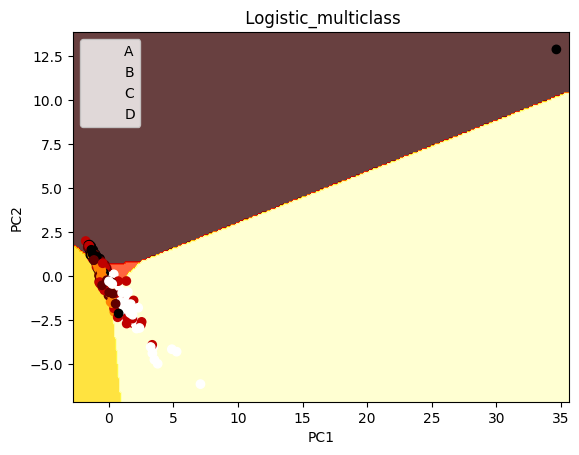

In [29]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
x1_min, x1_max = X_set[:, 0].min() - 1, X_set[:, 0].max() + 1
x2_min, x2_max = X_set[:, 1].min() - 1, X_set[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
Z = mod.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.75, cmap='hot')
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.scatter(X_set[:, 0], X_set[:, 1], c=y_set, cmap='gist_heat')
plt.title(' Logistic_multiclass')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(labels=['A','B','C','D'])
plt.show()

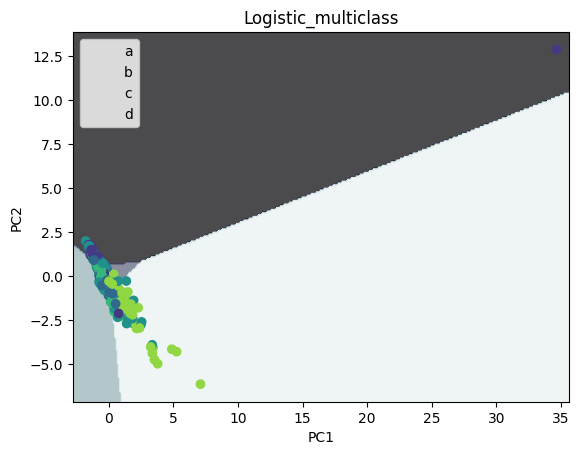

In [30]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
x1_min, x1_max = X_set[:, 0].min() - 1, X_set[:, 0].max() + 1
x2_min, x2_max = X_set[:, 1].min() - 1, X_set[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
Z = mod.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

# create a ListedColormap object with the same colors as 'viridis'
my_cmap = ListedColormap(sns.color_palette("viridis", n_colors=len(np.unique(y_set))))

plt.contourf(xx1, xx2, Z, alpha=0.75, cmap='bone')
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

# use the ListedColormap object for scatter plot and set labels for the legend
plt.scatter(X_set[:, 0], X_set[:, 1], c=y_set, cmap=my_cmap)
plt.title('Logistic_multiclass')
plt.xlabel('PC1')
plt.ylabel('PC2')

# set the labels for the legend
plt.legend(labels=['a', 'b', 'c', 'd'])
plt.show()


In [31]:
for i in range(1,20):
    clasifier=KNeighborsClassifier(n_neighbors=i,p=2,metric="euclidean")
    clasifier.fit(X_train,y_train)
    y_pred_train=clasifier.predict(X_train)
    y_pred_test=clasifier.predict(X_test)
    print("for k:",i)
    print("Train Data")
    print("Accuracy:{}".format(accuracy_score(y_train,y_pred_train)))
    print("Test Data")
    print("Accuracy:{}".format(accuracy_score(y_test,y_pred_test)))

for k: 1
Train Data
Accuracy:1.0
Test Data
Accuracy:0.5384615384615384
for k: 2
Train Data
Accuracy:0.7163461538461539
Test Data
Accuracy:0.40384615384615385
for k: 3
Train Data
Accuracy:0.7115384615384616
Test Data
Accuracy:0.5
for k: 4
Train Data
Accuracy:0.6682692307692307
Test Data
Accuracy:0.5384615384615384
for k: 5
Train Data
Accuracy:0.6057692307692307
Test Data
Accuracy:0.46153846153846156
for k: 6
Train Data
Accuracy:0.6105769230769231
Test Data
Accuracy:0.5384615384615384
for k: 7
Train Data
Accuracy:0.5913461538461539
Test Data
Accuracy:0.5192307692307693
for k: 8
Train Data
Accuracy:0.5817307692307693
Test Data
Accuracy:0.4807692307692308
for k: 9
Train Data
Accuracy:0.5673076923076923
Test Data
Accuracy:0.5384615384615384
for k: 10
Train Data
Accuracy:0.5721153846153846
Test Data
Accuracy:0.5384615384615384
for k: 11
Train Data
Accuracy:0.5432692307692307
Test Data
Accuracy:0.5192307692307693
for k: 12
Train Data
Accuracy:0.5625
Test Data
Accuracy:0.5
for k: 13
Train Data

In [32]:
my_model(kn)

train data
              precision    recall  f1-score   support

           0       0.59      0.82      0.69        44
           1       0.64      0.64      0.64        42
           2       0.62      0.39      0.48        41
           3       0.61      0.55      0.58        40
           4       0.81      0.85      0.83        41

    accuracy                           0.65       208
   macro avg       0.65      0.65      0.64       208
weighted avg       0.65      0.65      0.64       208

test data
              precision    recall  f1-score   support

           0       0.36      0.50      0.42         8
           1       0.64      0.70      0.67        10
           2       0.58      0.64      0.61        11
           3       0.50      0.25      0.33        12
           4       0.67      0.73      0.70        11

    accuracy                           0.56        52
   macro avg       0.55      0.56      0.55        52
weighted avg       0.56      0.56      0.55        52



KNeighborsClassifier(n_neighbors=4, p=1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


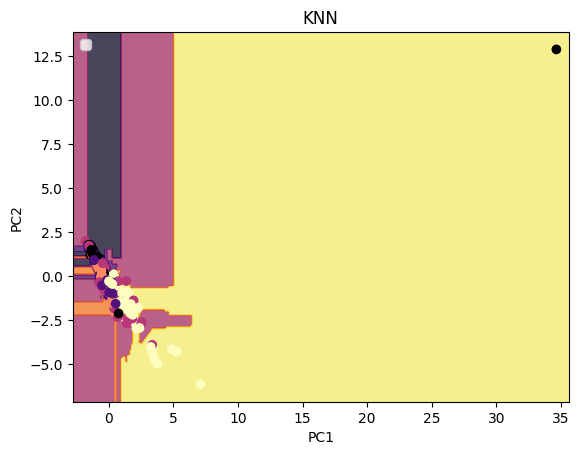

In [33]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
x1_min, x1_max = X_set[:, 0].min() - 1, X_set[:, 0].max() + 1
x2_min, x2_max = X_set[:, 1].min() - 1, X_set[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
Z = kn.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.75, cmap='inferno')
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.scatter(X_set[:, 0], X_set[:, 1], c=y_set, cmap='magma')
plt.title('KNN')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [34]:
my_model(nb)

train data
              precision    recall  f1-score   support

           0       0.36      0.95      0.52        44
           1       0.00      0.00      0.00        42
           2       0.00      0.00      0.00        41
           3       0.33      0.20      0.25        40
           4       0.57      0.90      0.70        41

    accuracy                           0.42       208
   macro avg       0.25      0.41      0.29       208
weighted avg       0.25      0.42      0.30       208

test data
              precision    recall  f1-score   support

           0       0.29      1.00      0.44         8
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00        11
           3       0.25      0.17      0.20        12
           4       0.56      0.82      0.67        11

    accuracy                           0.37        52
   macro avg       0.22      0.40      0.26        52
weighted avg       0.22      0.37      0.26        52



BernoulliNB()

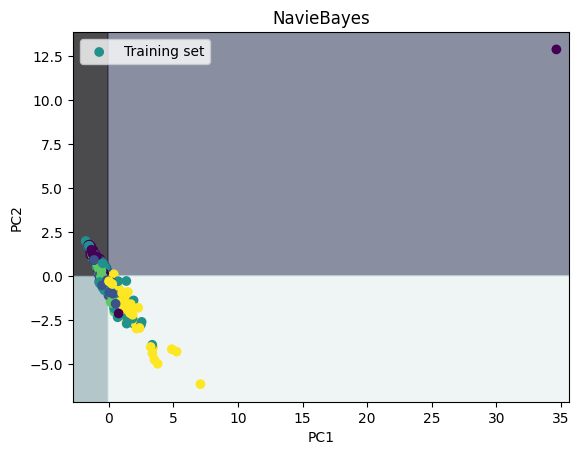

In [35]:
from matplotlib.colors import ListedColormap

# create meshgrid for contour plot
x1_min, x1_max = X_set[:, 0].min() - 1, X_set[:, 0].max() + 1
x2_min, x2_max = X_set[:, 1].min() - 1, X_set[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))

# predict and reshape
Z = nb.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

# plot contour and scatter
plt.contourf(xx1, xx2, Z, alpha=0.75, cmap='bone')
plt.scatter(X_set[:, 0], X_set[:, 1], c=y_set, cmap='viridis', label='Training set')

# set limits, title, and labels
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.title('NavieBayes')
plt.xlabel('PC1')
plt.ylabel('PC2')

# create legend
plt.legend()
plt.show()

In [36]:
my_model(svm)

train data
              precision    recall  f1-score   support

           0       0.44      0.91      0.59        44
           1       0.32      0.29      0.30        42
           2       0.13      0.05      0.07        41
           3       0.20      0.07      0.11        40
           4       0.54      0.66      0.59        41

    accuracy                           0.40       208
   macro avg       0.33      0.40      0.33       208
weighted avg       0.33      0.40      0.34       208

test data
              precision    recall  f1-score   support

           0       0.37      0.88      0.52         8
           1       0.38      0.60      0.46        10
           2       0.00      0.00      0.00        11
           3       0.50      0.08      0.14        12
           4       0.50      0.64      0.56        11

    accuracy                           0.40        52
   macro avg       0.35      0.44      0.34        52
weighted avg       0.35      0.40      0.32        52



SVC(kernel='sigmoid')

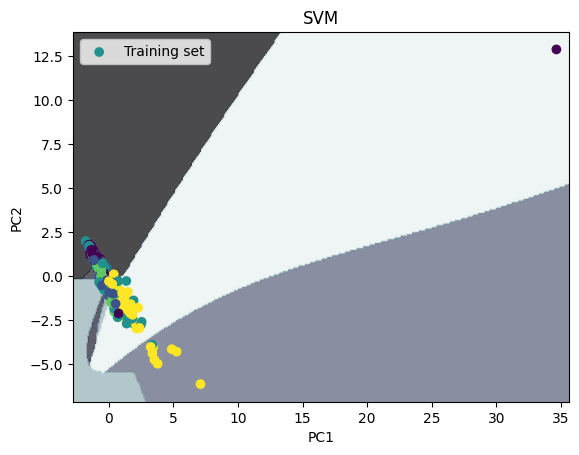

In [37]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = X_train, y_train
# x1_min, x1_max = X_set[:, 0].min() - 1, X_set[:, 0].max() + 1
# x2_min, x2_max = X_set[:, 1].min() - 1, X_set[:, 1].max() + 1
# xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
# Z = svm.predict(np.c_[xx1.ravel(), xx2.ravel()])
# Z = Z.reshape(xx1.shape)
# plt.contourf(xx1, xx2, Z, alpha=0.75, cmap='bone')
# plt.xlim(xx1.min(), xx1.max())
# plt.ylim(xx2.min(), xx2.max())
# plt.scatter(X_set[:, 0], X_set[:, 1], c=y_set, cmap='viridis')
# plt.title('SVM')
# plt.xlabel('PC1')
# plt.ylabel('PC2')
# plt.legend()
# plt.show()
from matplotlib.colors import ListedColormap

# create meshgrid for contour plot
x1_min, x1_max = X_set[:, 0].min() - 1, X_set[:, 0].max() + 1
x2_min, x2_max = X_set[:, 1].min() - 1, X_set[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))

# predict and reshape
Z = svm.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

# plot contour and scatter
plt.contourf(xx1, xx2, Z, alpha=0.75, cmap='bone', label='Decision boundary')
plt.scatter(X_set[:, 0], X_set[:, 1], c=y_set, cmap='viridis', label='Training set')

# set limits, title, and labels
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.title('SVM')
plt.xlabel('PC1')
plt.ylabel('PC2')

# create legend
plt.legend()
plt.show()


In [38]:
my_model(rfc)

train data
              precision    recall  f1-score   support

           0       0.56      0.93      0.70        44
           1       0.48      0.67      0.56        42
           2       1.00      0.24      0.39        41
           3       0.61      0.42      0.50        40
           4       0.90      0.85      0.88        41

    accuracy                           0.63       208
   macro avg       0.71      0.62      0.61       208
weighted avg       0.71      0.63      0.61       208

test data
              precision    recall  f1-score   support

           0       0.43      0.75      0.55         8
           1       0.43      0.60      0.50        10
           2       0.67      0.18      0.29        11
           3       0.38      0.25      0.30        12
           4       0.54      0.64      0.58        11

    accuracy                           0.46        52
   macro avg       0.49      0.48      0.44        52
weighted avg       0.49      0.46      0.43        52



RandomForestClassifier(max_depth=4, random_state=0)

In [39]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = X_train, y_train
# x1_min, x1_max = X_set[:, 0].min() - 1, X_set[:, 0].max() + 1
# x2_min, x2_max = X_set[:, 1].min() - 1, X_set[:, 1].max() + 1
# xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
# Z = rfc.predict(np.c_[xx1.ravel(), xx2.ravel()])
# Z = Z.reshape(xx1.shape)
# plt.contourf(xx1, xx2, Z, alpha=0.75, cmap='inferno')
# plt.xlim(xx1.min(), xx1.max())
# plt.ylim(xx2.min(), xx2.max())
# plt.scatter(X_set[:, 0], X_set[:, 1], c=y_set, cmap='magma')
# plt.title('Randomforest')
# plt.xlabel('PC1')
# plt.ylabel('PC2')
# plt.legend()
# plt.show()

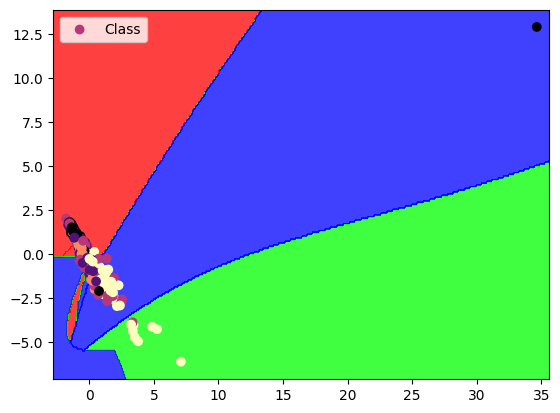

In [40]:
from matplotlib.colors import ListedColormap

# Define a colormap for the contour plot
cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plot the contour plot with a label
plt.contourf(xx1, xx2, Z, alpha=0.75, cmap=cmap, label='Decision boundary')

# Add labels to the scatter plot points
plt.scatter(X_set[:, 0], X_set[:, 1], c=y_set, cmap='magma', label='Class')

# Generate the legend
plt.legend()


In [41]:
my_model(dt)

train data
              precision    recall  f1-score   support

           0       0.70      0.86      0.78        44
           1       0.64      0.60      0.62        42
           2       0.91      0.49      0.63        41
           3       0.62      0.78      0.69        40
           4       0.93      0.98      0.95        41

    accuracy                           0.74       208
   macro avg       0.76      0.74      0.73       208
weighted avg       0.76      0.74      0.73       208

test data
              precision    recall  f1-score   support

           0       0.50      0.62      0.56         8
           1       0.43      0.30      0.35        10
           2       0.38      0.27      0.32        11
           3       0.56      0.75      0.64        12
           4       0.55      0.55      0.55        11

    accuracy                           0.50        52
   macro avg       0.48      0.50      0.48        52
weighted avg       0.48      0.50      0.48        52



DecisionTreeClassifier(max_depth=7, max_features='auto', random_state=0)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


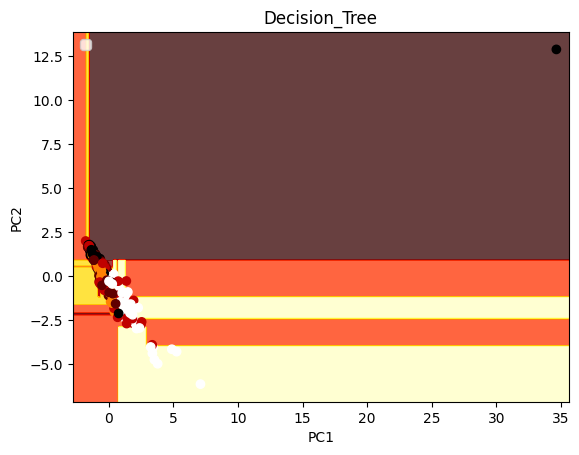

In [42]:

from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
x1_min, x1_max = X_set[:, 0].min() - 1, X_set[:, 0].max() + 1
x2_min, x2_max = X_set[:, 1].min() - 1, X_set[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
Z = dt.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.75, cmap='hot')
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.scatter(X_set[:, 0], X_set[:, 1], c=y_set, cmap='gist_heat')
plt.title('Decision_Tree')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [43]:
my_model(abc)

train data
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        44
           1       0.38      0.31      0.34        42
           2       0.22      0.78      0.34        41
           3       0.27      0.10      0.15        40
           4       0.55      0.15      0.23        41

    accuracy                           0.26       208
   macro avg       0.28      0.27      0.21       208
weighted avg       0.28      0.26      0.21       208

test data
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.43      0.60      0.50        10
           2       0.26      0.82      0.39        11
           3       0.00      0.00      0.00        12
           4       0.33      0.09      0.14        11

    accuracy                           0.31        52
   macro avg       0.20      0.30      0.21        52
weighted avg       0.21      0.31      0.21        52



AdaBoostClassifier(learning_rate=0.7, random_state=0)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


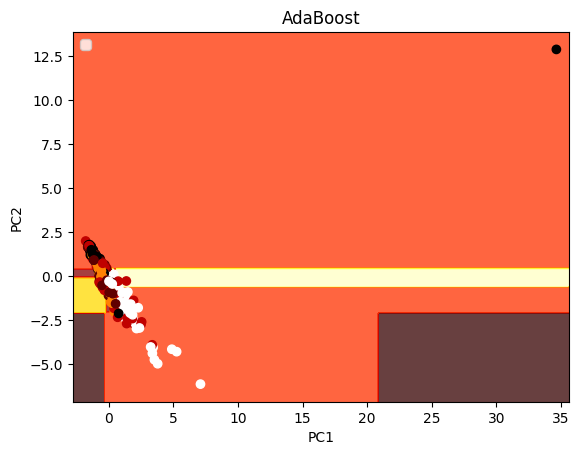

In [44]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
x1_min, x1_max = X_set[:, 0].min() - 1, X_set[:, 0].max() + 1
x2_min, x2_max = X_set[:, 1].min() - 1, X_set[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
Z = abc.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.75, cmap='hot')
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.scatter(X_set[:, 0], X_set[:, 1], c=y_set, cmap='gist_heat')
plt.title('AdaBoost')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

<AxesSubplot:xlabel='Train_accuracy', ylabel='Test_accuracy'>

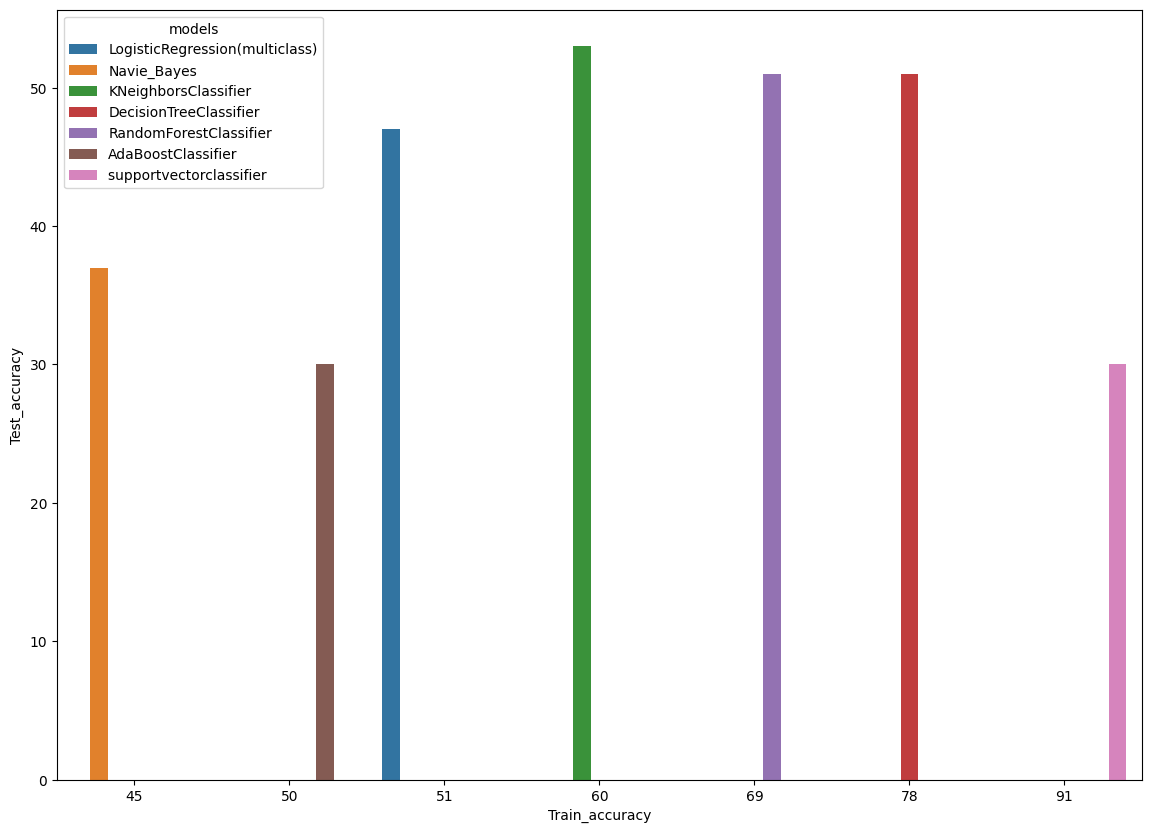

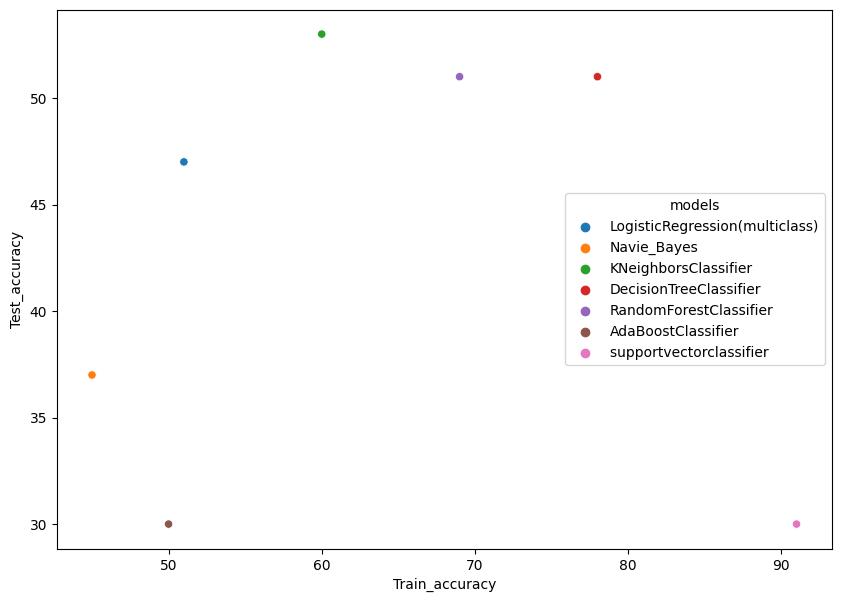

In [45]:
data={"models":["LogisticRegression(multiclass)","Navie_Bayes","KNeighborsClassifier","DecisionTreeClassifier","RandomForestClassifier","AdaBoostClassifier","supportvectorclassifier "],
"Train_accuracy":[51,45,60,78,69,50,91],
"Test_accuracy":[47,37,53,51,51,30,30]
}
df1=pd.DataFrame(data)
plt.figure(figsize=(14,10))
sns.barplot(x=df1["Train_accuracy"],y=df1["Test_accuracy"],hue=df1["models"])
plt.figure(figsize=(10,7))
sns.scatterplot(x=df1["Train_accuracy"],y=df1["Test_accuracy"],hue=df1["models"])

In [46]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[6 2 0 0 0]
 [0 4 0 5 1]
 [4 1 0 0 6]
 [5 6 0 1 0]
 [0 2 0 1 8]]


0.36538461538461536

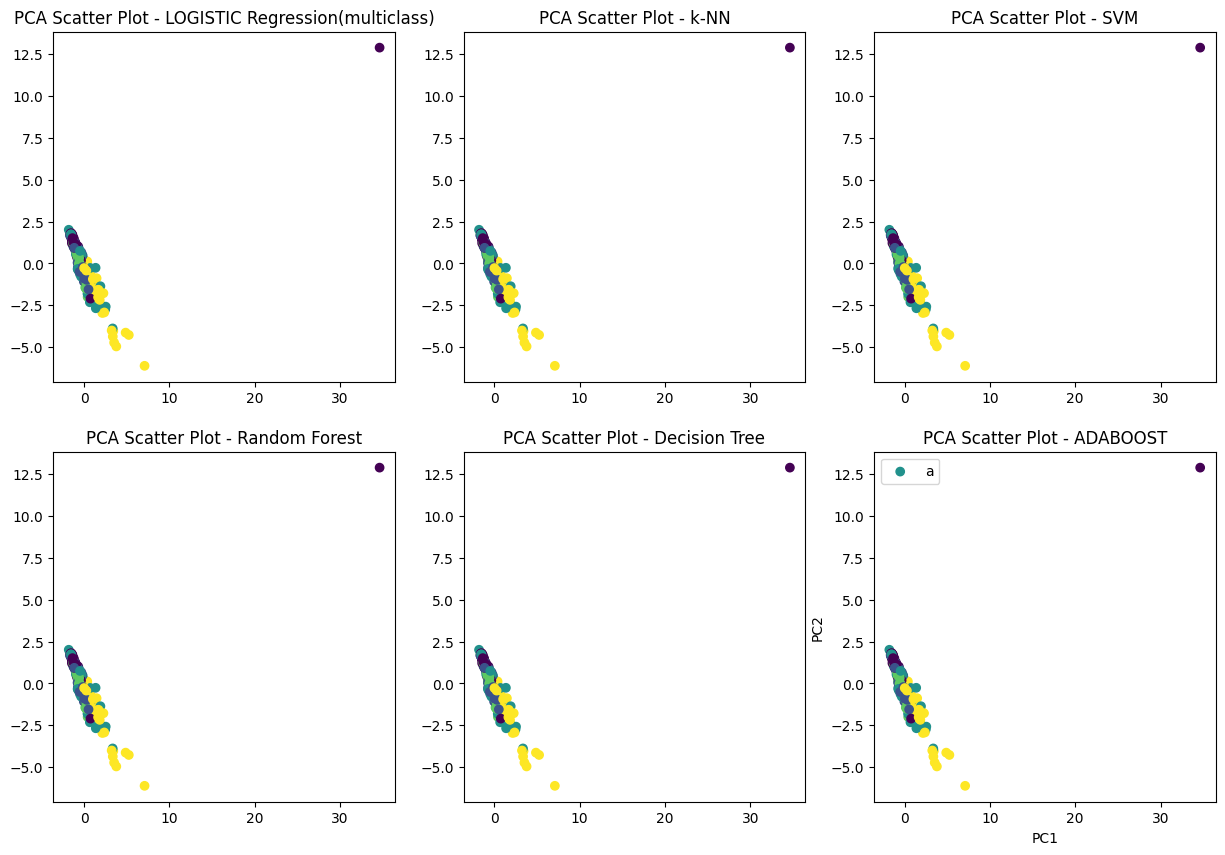

In [48]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax = ax.ravel()

# plot the scatter plot for LogisticRegression
ax[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')
ax[0].set_title('PCA Scatter Plot - LOGISTIC Regression(multiclass)')
plt.xlabel('PC1')
plt.ylabel('PC2')


# plot the scatter plot for Decision Tree
ax[4].scatter(X_train[:, 0], X_train[:, 1] ,c=y_train, cmap='viridis')
ax[4].set_title('PCA Scatter Plot - Decision Tree')
plt.xlabel('PC1')
plt.ylabel('PC2')


# plot the scatter plot for Random Forest
ax[3].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')
ax[3].set_title('PCA Scatter Plot - Random Forest')
plt.xlabel('PC1')
plt.ylabel('PC2')

# plot the scatter plot for SVM
ax[2].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')
ax[2].set_title('PCA Scatter Plot - SVM')
plt.xlabel('PC1')
plt.ylabel('PC2')

# plot the scatter plot for k-NN
ax[1].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')
ax[1].set_title('PCA Scatter Plot - k-NN')
#plt.legend(labels=['a', 'b', 'c', 'd'])
plt.xlabel('PC1')
plt.ylabel('PC2')



# plot the scatter plot for ADABOOST
ax[5].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')
ax[5].set_title('PCA Scatter Plot - ADABOOST')

# show the plots
#plt.tight_layout()
plt.legend(labels=['a', 'b', 'c', 'd'])
plt.show()

In [49]:
mod.fit(X_train, y_train)
kn.fit(X_train, y_train)
svm.fit(X_train, y_train)
rfc.fit(X_train, y_train)
rfc.fit(X_train, y_train)
abc.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.7, random_state=0)

In [50]:
# Fitting Logistic Regression To the training set
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


LogisticRegression(random_state=0)

In [51]:
# Predicting the test set result using
# predict function under LogisticRegression
y_pred = classifier.predict(X_test)


In [52]:
# making confusion matrix between
# test set of Y and predicted value.
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)


In [53]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
					stop = X_set[:, 0].max() + 1, step = 0.01),
					np.arange(start = X_set[:, 1].min() - 1,
					stop = X_set[:, 1].max() + 1, step = 0.01))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

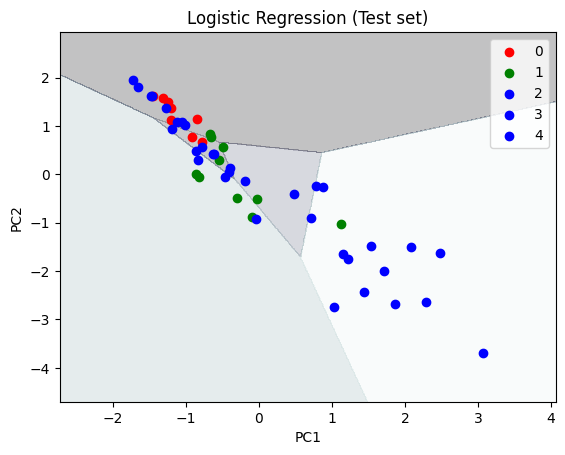

In [54]:
# Visualising the Test set results through scatter plot
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
					stop = X_set[:, 0].max() + 1, step = 0.01),
					np.arange(start = X_set[:, 1].min() - 1,
					stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
			X2.ravel()]).T).reshape(X1.shape), alpha = 0.25,
			cmap = 'bone')

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
				c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

# title for scatter plot
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend()

# show scatter plot
plt.show()


In [55]:
# plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
# 			X2.ravel()]).T).reshape(X1.shape),
# 			cmap = 'bone')

In [56]:
# # Predicting the training set
# # result through scatter plot
# from matplotlib.colors import ListedColormap

# X_set, y_set = X_train, y_train
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
# 					stop = X_set[:, 0].max() + 1, step = 0.01),
# 					np.arange(start = X_set[:, 1].min() - 1,
# 					stop = X_set[:, 1].max() + 1, step = 0.01))

# plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
# 			X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
# 			cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())

# for i, j in enumerate(np.unique(y_set)):
# 	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
# 				c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

# plt.title('Logistic Regression (Training set)')
# plt.xlabel('PC1') # for Xlabel
# plt.ylabel('PC2') # for Ylabel
# plt.legend() # to show legend

# # show scatter plot
# plt.show()


<AxesSubplot:>

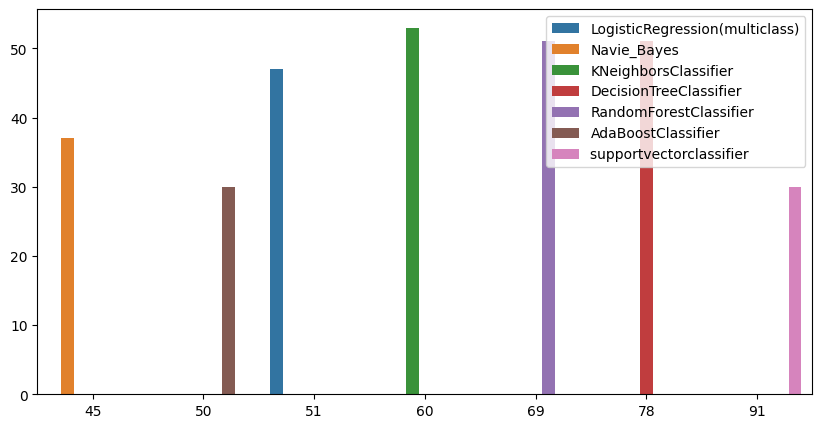

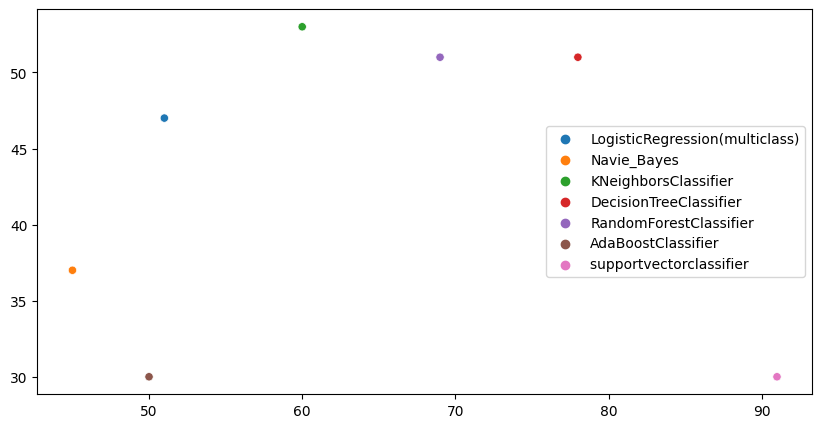

In [57]:
#X=models,y=train_accuracy
data={"models":["LogisticRegression(multiclass)","Navie_Bayes","KNeighborsClassifier","DecisionTreeClassifier","RandomForestClassifier","AdaBoostClassifier","supportvectorclassifier "],
"Train_accuracy":[51,45,60,78,69,50,91],
"Test_accuracy":[47,37,53,51,51,30,30]
}
df=pd.DataFrame(data)
plt.figure(figsize=(10,5))
sns.barplot(x=data["Train_accuracy"],y=data["Test_accuracy"],hue=data["models"])
plt.figure(figsize=(10,5))
sns.scatterplot(x=data["Train_accuracy"],y=data["Test_accuracy"],hue=data["models"])

In [58]:
import tensorflow as tf
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense,Dropout
from sklearn.metrics import classification_report 
from tensorflow.keras.callbacks import EarlyStopping